In [1]:
from HeaderP import *
import Astraea
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random

from astroML.utils.decorators import pickle_results
from astroML.density_estimation import XDGMM
from astroML.plotting.tools import draw_ellipse

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=25, usetex=False)

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

Text(0, 0.5, 'kin_age')

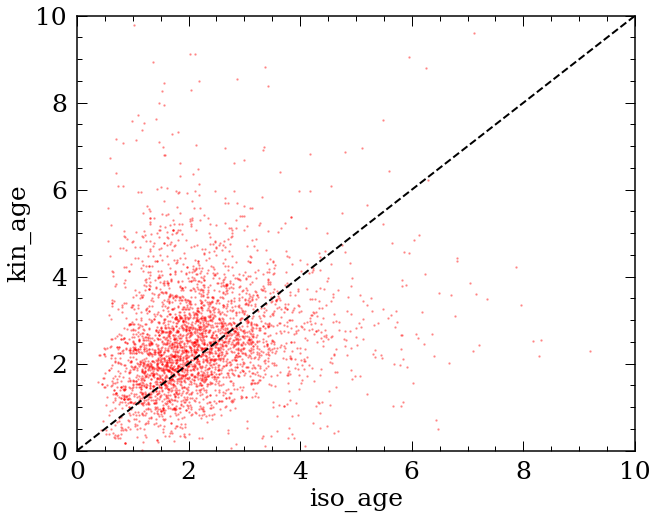

In [2]:
df_prot_s=pd.read_pickle('minchisq.pkl')
df_prot_s=df_prot_s.dropna(subset=['iso_age_ave','kin_age'])

df_prot_s=df_prot_s.loc[df_prot_s['iso_age']<10]
df_prot_s=df_prot_s.loc[df_prot_s['iso_age_err1']<3]
df_prot_s=df_prot_s.dropna(subset=['iso_age','iso_age_err','kin_age_err','kin_age'])

iso = df_prot_s.iso_age_ave.values
kin = df_prot_s.kin_age.values

# stack the results for computation
X = np.vstack([iso, kin]).T
Xerr = np.zeros(X.shape + X.shape[-1:])
diag = np.arange(X.shape[-1])
Xerr[:, diag, diag] = np.vstack([df_prot_s.iso_age_err.values ** 2, df_prot_s.kin_age_err_bs.values ** 2]).T

plt.figure(figsize=(10,8))
plt.plot(iso, kin, 'r.', markersize=3, alpha=.3)
plt.plot([0,10], [0,10], 'k--')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('iso_age')
plt.ylabel('kin_age')


In [3]:
#------------------------------------------------------------
# compute and save results
@pickle_results("XD_toy.pkl")
def compute_XD_results(n_components=10, max_iter=500):
    print('computing')
    clf = XDGMM(n_components, max_iter=max_iter)
    print('fitting')
    clf.fit(X, Xerr)
    print('finish')
    return clf

clf = compute_XD_results(10, 500)
sample = clf.sample(200)


@pickle_results: computing results and saving to 'XD_toy.pkl'
computing
fitting
finish


In [4]:
plotpar = {'axes.labelsize': 20,
           'font.size': 20,
           'xtick.labelsize': 20,
           'ytick.labelsize': 20,
           'text.usetex': True}
plt.rcParams.update(plotpar)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(16, 5))
# fig.subplots_adjust(left=0.1, right=0.95,
#                     bottom=0.1, top=0.95,
#                     wspace=0.02, hspace=0.02)

ax1 = fig.add_subplot(131)
ax1.plot(iso, kin, "k.", ms=1, alpha=.3)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10);
xs = np.linspace(0, 10, 100)
ax1.plot(xs, xs)
ax1.set_xlabel("Isochronal age")
ax1.set_ylabel("Kinematic age")
ax1.set_title("Original data", fontsize=20)

ax2 = fig.add_subplot(132)
for i in range(clf.n_components):
    draw_ellipse(clf.mu[i], clf.V[i], scales=[2], ax=ax2,
                 ec='k', fc='gray', alpha=0.2)
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)
ax2.set_xlabel("Isochronal age")
ax2.set_ylabel("Kinematic age")
ax2.set_title("Mixture of Gaussians", fontsize=20)
    
ax3 = fig.add_subplot(133)
ax3.scatter(sample[:, 0], sample[:, 1], s=4, lw=0, c='k')
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 10);
ax3.plot(xs, xs)
ax3.set_xlabel("Isochronal age")
ax3.set_ylabel("Kinematic age");
ax3.set_title("Deconvolved data (sample size = 200)", fontsize=20);

plt.tight_layout()

plt.savefig('XD.png')

FileNotFoundError: [Errno 2] No such file or directory: 'kpsewhich': 'kpsewhich'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11637fd90> (for post_execute):


FileNotFoundError: [Errno 2] No such file or directory: 'kpsewhich': 'kpsewhich'

FileNotFoundError: [Errno 2] No such file or directory: 'kpsewhich': 'kpsewhich'

<Figure size 1152x360 with 3 Axes>

# Rvar

Text(0, 0.5, 'kin_age')

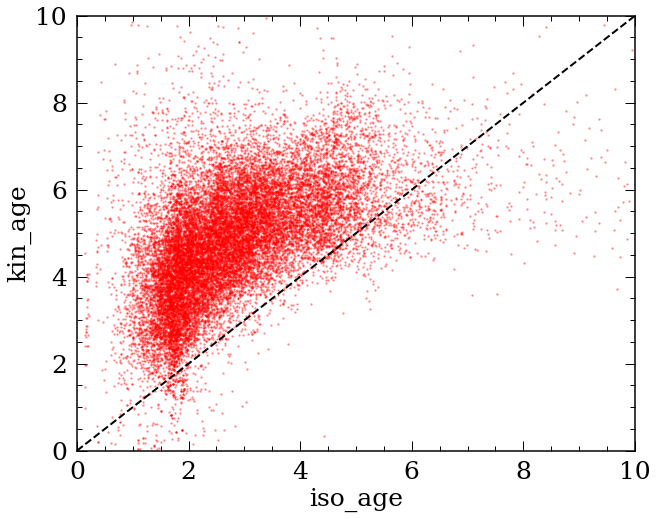

In [157]:
df_rvar_s=pd.read_pickle('minchisq_rvar.pkl')
df_rvar_s=df_rvar_s.dropna(subset=['iso_age_ave','kin_age','iso_age_err','kin_age_err'])

df_rvar_s=df_rvar_s.loc[df_rvar_s['iso_age']<10]
df_rvar_s=df_rvar_s.loc[df_rvar_s['iso_age_err1']<3]
df_rvar_s=df_rvar_s.dropna(subset=['iso_age','iso_age_err','kin_age'])

iso = df_rvar_s.iso_age_ave.values
kin = df_rvar_s.kin_age.values

# stack the results for computation
X = np.vstack([iso, kin]).T
Xerr = np.zeros(X.shape + X.shape[-1:])
diag = np.arange(X.shape[-1])
Xerr[:, diag, diag] = np.vstack([df_rvar_s.iso_age_err.values ** 2, df_rvar_s.kin_age_err ** 2]).T

plt.figure(figsize=(10,8))
plt.plot(iso, kin, 'r.', markersize=3, alpha=.3)
plt.plot([0,10], [0,10], 'k--')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('iso_age')
plt.ylabel('kin_age')

In [158]:
#------------------------------------------------------------
# compute and save results
@pickle_results("XD_toy_rvar.pkl")
def compute_XD_results(n_components=10, max_iter=500):
    print('computing')
    clf = XDGMM(n_components, max_iter=max_iter)
    print('fitting')
    clf.fit(X, Xerr)
    print('finish')
    return clf

clf = compute_XD_results(10, 500)
sample = clf.sample(1000)

@pickle_results: computing results and saving to 'XD_toy_rvar.pkl'
computing
fitting


KeyboardInterrupt: 

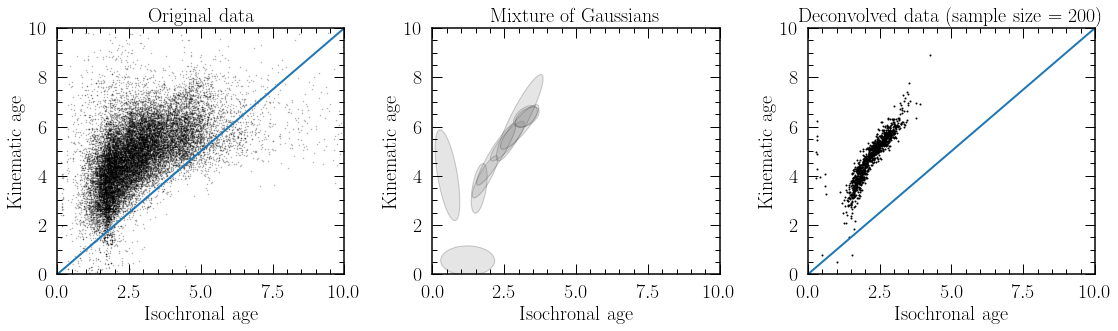

In [151]:
plotpar = {'axes.labelsize': 20,
           'font.size': 20,
           'xtick.labelsize': 20,
           'ytick.labelsize': 20,
           'text.usetex': True}
plt.rcParams.update(plotpar)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(16, 5))
# fig.subplots_adjust(left=0.1, right=0.95,
#                     bottom=0.1, top=0.95,
#                     wspace=0.02, hspace=0.02)

ax1 = fig.add_subplot(131)
ax1.plot(iso, kin, "k.", ms=1, alpha=.3)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10);
xs = np.linspace(0, 10, 100)
ax1.plot(xs, xs)
ax1.set_xlabel("Isochronal age")
ax1.set_ylabel("Kinematic age")
ax1.set_title("Original data", fontsize=20)

ax2 = fig.add_subplot(132)
for i in range(clf.n_components):
    draw_ellipse(clf.mu[i], clf.V[i], scales=[2], ax=ax2,
                 ec='k', fc='gray', alpha=0.2)
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)
ax2.set_xlabel("Isochronal age")
ax2.set_ylabel("Kinematic age")
ax2.set_title("Mixture of Gaussians", fontsize=20)
    
ax3 = fig.add_subplot(133)
ax3.scatter(sample[:, 0], sample[:, 1], s=4, lw=0, c='k')
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 10);
ax3.plot(xs, xs)
ax3.set_xlabel("Isochronal age")
ax3.set_ylabel("Kinematic age");
ax3.set_title("Deconvolved data (sample size = 200)", fontsize=20);

plt.tight_layout()
plt.savefig('XD_rvar.png')